# Chapter 2

En este capítulo haré una exploración de mis datos y una visualización de lo que tengo.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
import warnings
warnings.filterwarnings('ignore')

In [41]:
df=pd.read_csv("e:/piere/Documentos/Portafolio/JMIA/Data/RAW/JMIA.csv")

In [42]:
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-12,18.950001,25.459999,18.260000,25.459999,25.459999,9472300
1,2019-04-15,26.940001,39.950001,25.629999,31.910000,31.910000,12857300
2,2019-04-16,35.330002,43.500000,33.099998,43.040001,43.040001,12939400


In [43]:
df["Date"]=df["Date"].astype("datetime64[ns]")
df=df.set_index("Date")

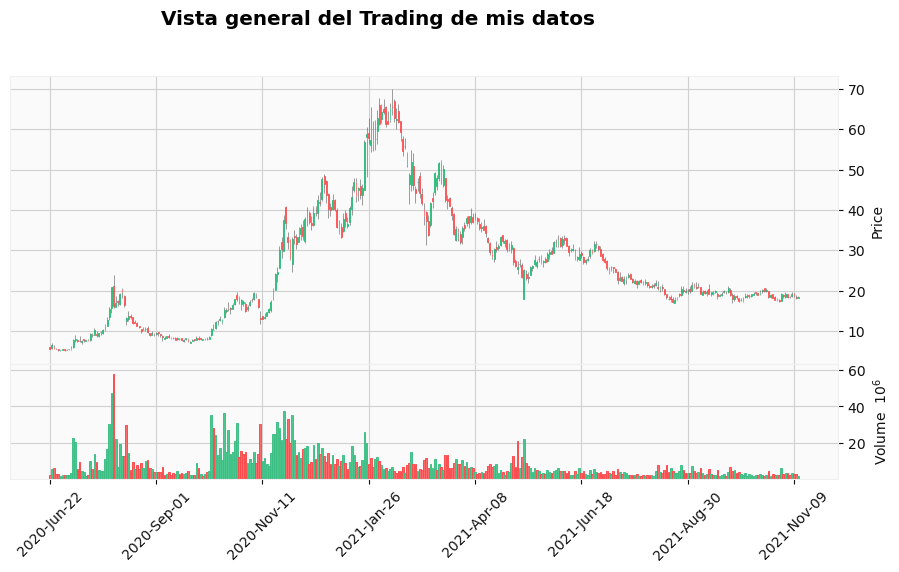

In [76]:
mpf.plot(df.iloc[300:],type="candle",volume=True,style="yahoo",figratio = (2, 1),title="Vista general del Trading de mis datos")


Al observar los datos de 